In [1]:
#                                            Filling missing values randomly with available data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('csv files/titanic.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [5]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [6]:
X = df.drop(columns=['Survived'])   # feature
y = df['Survived']                  # Target 

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750
...,...,...
106,21.0,7.6500
270,NaN,31.0000
860,41.0,14.1083
435,14.0,120.0000


In [9]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']
# copy

In [10]:
X_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


In [11]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values
# NaN values of 'Age_imputed' columns are filled randomly with non NaN values of Age column 

In [12]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([27.  , 22.  , 31.  , 32.5 , 21.  , 47.  , 28.  , 27.  , 20.  ,
        0.67, 45.  , 30.  , 27.  , 31.  , 29.  , 34.  , 30.  , 24.  ,
       34.  , 20.  ,  0.83, 24.  , 23.  , 26.  , 23.  , 51.  , 28.  ,
       22.  , 19.  , 36.5 , 24.  , 64.  , 19.  , 35.  , 25.  , 24.  ,
       80.  , 18.  , 58.  , 36.  , 18.  , 50.  , 18.  , 25.  , 44.  ,
       40.  , 33.  , 16.  , 24.  , 36.  , 61.  , 19.  , 18.  , 22.  ,
       30.  , 31.  , 55.  , 25.  , 54.  ,  0.42, 25.  , 33.  , 35.  ,
       32.5 , 43.  , 28.  , 35.  ,  4.  , 46.  , 22.  , 36.  , 25.  ,
       42.  , 32.  , 36.  , 62.  , 49.  , 47.  , 62.  , 45.  , 42.  ,
       27.  , 45.  ,  9.  , 35.  , 30.  , 28.  , 45.  , 36.  ,  7.  ,
       31.  , 34.  , 43.  , 35.  , 27.  , 42.  , 47.  , 19.  , 29.  ,
       16.  ,  3.  , 45.  , 74.  , 24.  , 30.  , 11.  , 21.  ,  2.  ,
       31.  , 44.  , 16.  ,  9.  , 19.  , 23.  , 24.  , 25.  , 28.  ,
       19.  , 54.  , 21.  , 21.  , 31.  , 43.  , 30.  , 24.  , 24.  ,
       25.  , 41.  ,

In [20]:
X_train
# Now Age_imputed column has no missing values 

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,31.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


C:\Users\sudip\AppData\Local\Temp\ipykernel_8108\2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\sudip\AppData\Local\Temp\ipykernel_8108\2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['A

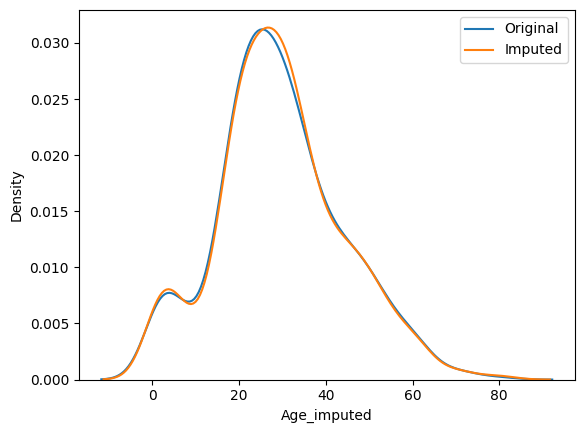

In [25]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [26]:
# distributions remains almost same . 

In [28]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())
# almost same

Original variable variance:  210.2517072477435
Variance after random imputation:  210.62343056918567


In [30]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()
# little more covariance between original and imputed

,Fare,Age,Age_imputed
Fare,2700.831981,71.580633,59.557487
Age,71.580633,210.251707,210.251707
Age_imputed,59.557487,210.251707,210.623431


<Axes: >

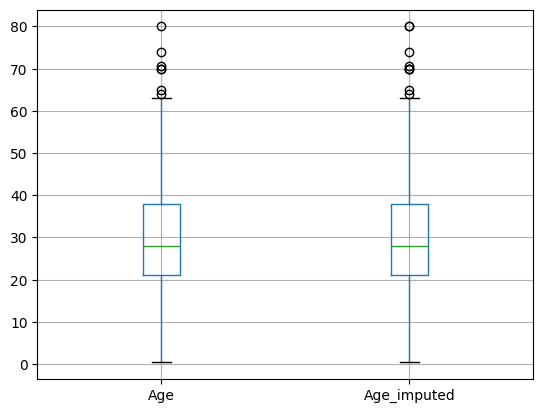

In [32]:
X_train[['Age', 'Age_imputed']].boxplot()
# almost same

In [34]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(df['Fare']))
# for same input output must be same .